# This is just to separate and resize the 1024 x 1024, 8-bit grayscale, non-interlaced original images into 128 x 128(or 224 x 224), 8-bit/color RGB, non-interlaced we will use in our CNN.

In [1]:
# loading everything we need!!!
import cv2
import os
import random
import matplotlib.pylab as plt
from glob import glob
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Before starting to read the original images we need to unpack all .tar.gz files with the shell command  tar -xf images_00(1-12).tar.gz, if you have a big HD you can umpack everything with no big problem.

# another trick to select random images and create a small subset is to use the shell command: shuf -zn500 -e *.png | xargs -0 cp -vt ../select/, this will randomly selct 500 images and copy to a new folder called select.

In [2]:
#put the path to the images and finding labels
# ../input/
PATH = os.path.abspath(os.path.join('..', 'Medical_Xray_CNN'))

# ../input/sample/images/
SOURCE_IMAGES = os.path.join(PATH, "img", "images")

# ../input/sample/images/*.png
images = glob(os.path.join(SOURCE_IMAGES, "*.png"))

# Load labels
labels = pd.read_csv('Data_Entry_2017.csv')

In [3]:
labels.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN


/home/felipe/Medical_Xray_CNN/img/images/00029688_009.png
/home/felipe/Medical_Xray_CNN/img/images/00028518_023.png
/home/felipe/Medical_Xray_CNN/img/images/00030755_000.png


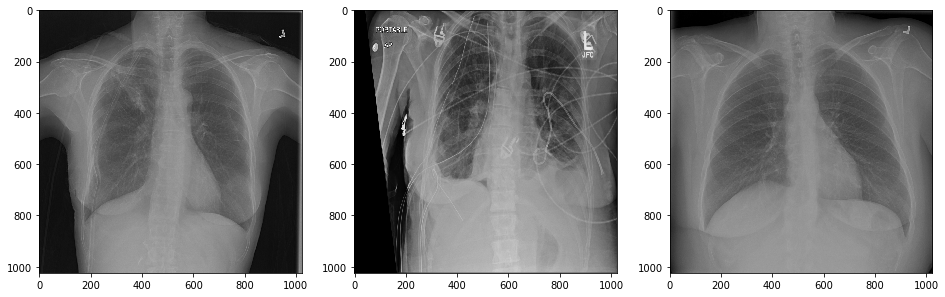

In [3]:
#just printing random images to check if it loaded correctly.
r = random.sample(images, 3)
plt.figure(figsize=(16,16))
plt.subplot(131)
plt.imshow(cv2.imread(r[0]))
print(r[0])
print(r[1])
print(r[2])

plt.subplot(132)
plt.imshow(cv2.imread(r[1]))

plt.subplot(133)
plt.imshow(cv2.imread(r[2]))
plt.show()

# this is the fun part, this function will select what kind of label we want, Pneumo, infiltration, etc. resize to the disered size using cv2 and write the image in a new folder.

In [4]:

def select_images():
    disease = 'Pneumothorax'
    WIDTH = 128
    HEIGHT = 128
    for img in images:
        base = os.path.basename(img)
        finding = labels["Finding Labels"][labels["Image Index"] == base].values[0]
        # Read and resize image
        if disease in finding:
            full_size_image = cv2.imread(img)
            resized = cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC)
            path = './img/pneumothorax_img'
            cv2.imwrite(os.path.join(path , '{}'.format(base)), resized)
    return

In [5]:
select_images()

# Check if the selections are correct!!

In [19]:
labels['Finding Labels'][labels['Image Index']=='']

2801    Consolidation|Infiltration|Pneumothorax
Name: Finding Labels, dtype: object